Group 4: Jayson, Saul, Chunmei, and Daniel

K-leaping: Keep the population increments, K fixed, but vary the time over which they happen. In the case of an increment by K = 1, the method
reduces to the exact method implemented by Group 2. When K > 1, the time increment is the sum of exponentially distributed random variables with diﬀerent parameters. we approximate the distribution of a sum of K
exponentially distributed random variables with the same parameters which follows a gamma distribution.

In [1]:
from scipy.stats import gamma
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.integrate import solve_ivp
from numba import jit

# Simulation of a HOMOGENEOUS Poisson process ν(t)=0.4n

1. Yule process at time t=10

Text(0, 0.5, 'Probability for each population size bin')

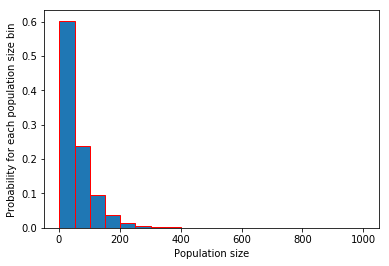

In [2]:
hist=[]
N=[]               # a sequence of population size
n_max=1000        # maximum population size
t=10               # time t=10 
dn=int(n_max/20)   # separate the sequence of population size into 20 bins
n=np.array(range(1,n_max+1,1)) # population size from 1 to 1000
t=np.array([t]*len(n))

# Yule process with Pn(t)=exp(-beta*t)*(1-exp(-beta*t))^(n-1)
P=(np.exp(np.array([-0.4]*len(n))*t)*(np.array([1]*len(n))-np.exp(np.array([-0.4]*len(n))*t))**(n-np.array([1]*len(n))))

# plot the distribution of population size
for i in range(20):
    hist.append(np.sum(P[i*dn:i*dn+dn]))
    N.append(n[i*dn+int(dn/2)])
plt.bar(N,hist,width=dn,edgecolor='r')
plt.xlabel('Population size')
plt.ylabel('Probability for each population size bin')

K-leaping for time t=10, v(t)=0.4n

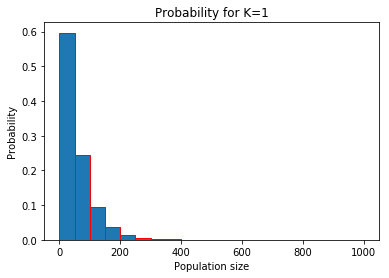

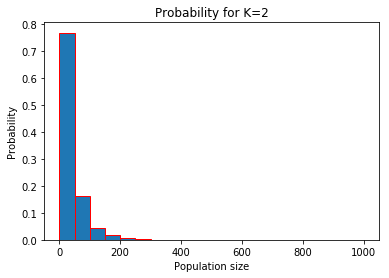

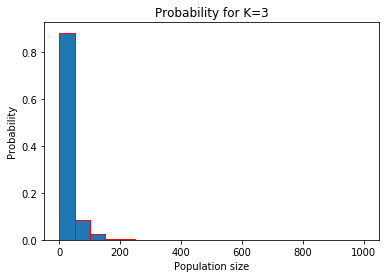

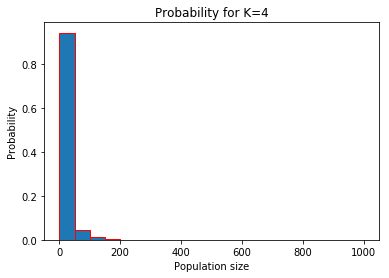

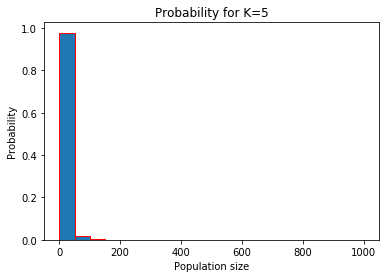

In [3]:
N=10000             # number of iterations
K=[1, 2, 3, 4, 5]   # number of different K values
n0=1                # initial population size
n=[0]*N             # population size at time t
t0=0                # initial time
t=[0.0]*N           # time 
P=1000              # maximum population size
n_bins=20           # number of bins

for i in range(len(K)):
    for j in range(N):

        # initialize the time t and population size
        t[j]=t0
        n[j]=n0
        
        # random sample t increment (dt) from gamma distribution
        dt=np.random.gamma(K[i], scale=(1/(0.4*n[j])), size=None)
        t[j]=t[j]+dt
        while (t[j]<=10):
            n[j]=n[j]+K[i]  #population size
            dt=np.random.gamma(K[i], scale=(1/(0.4*n[j])), size=None)
            t[j]=t[j]+dt
    
    (n_hist,n_Bins)=np.histogram(n,bins=range(0,P+1,int(P/n_bins)))        
    N_Bins=n_Bins[0:n_bins]+int(P/n_bins/2)
    prob_hist=n_hist/N   
    fig = plt.figure()
    plt.bar(N_Bins,prob_hist,width=int(P/n_bins),edgecolor='r')
    plt.title(f'Probability for K={K[i]}')
    plt.xlabel('Population size')
    plt.ylabel('Probability')    

2. Yule process at time t=20

Text(0, 0.5, 'Probability for each population size bin')

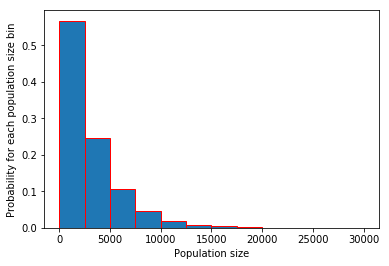

In [4]:
hist=[]
N=[]                 # a sequence of population size
n_max=30000          # maximum population size
t=20                 # time t=20 
dn=int(n_max/12)     # separate the sequence of population size into 12 bins
n=np.array(range(1,n_max+1,1)) # population size from 1 to 30000
t=np.array([t]*len(n))

# Yule process with Pn(t)=exp(-beta*t)*(1-exp(-beta*t))^(n-1)
P=(np.exp(np.array([-0.4]*len(n))*t)*(np.array([1]*len(n))-np.exp(np.array([-0.4]*len(n))*t))**(n-np.array([1]*len(n))))

# plot the distribution of population size
for i in range(12):
    hist.append(np.sum(P[i*dn:i*dn+dn]))
    N.append(n[i*dn+int(dn/2)])
plt.bar(N,hist,width=dn,edgecolor='r')
plt.xlabel('Population size')
plt.ylabel('Probability for each population size bin')

K-leaping for time t=20, v(t)=0.4n

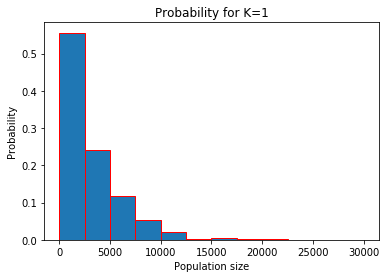

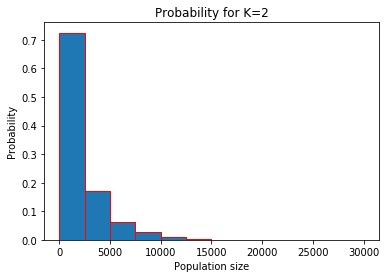

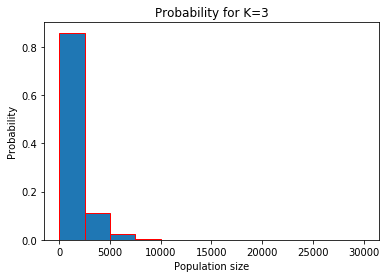

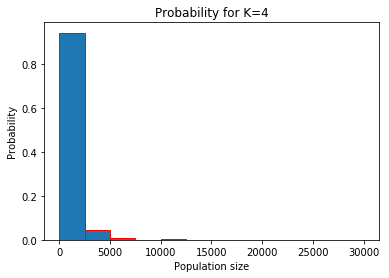

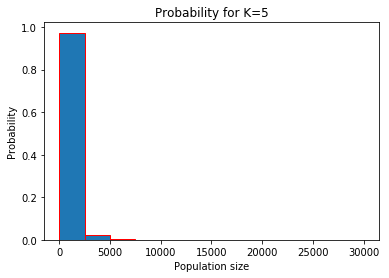

In [5]:
N=1000             # number of iterations
K=[1, 2, 3, 4, 5]   # number of different K values
n0=1                # initial population size
n=[0]*N             # population size at time t
t0=0                # initial time
t=[0.0]*N           # time at the end
P=30000             # maximum population size
n_bins=12           # number of bins

for i in range(len(K)):
    for j in range(N):

        # initialize the time t and population size
        t[j]=t0
        n[j]=n0
        
        # random sample t increment (dt) from gamma distribution
        dt=np.random.gamma(K[i], scale=(1/(0.4*n[j])), size=None)
        t[j]=t[j]+dt
        while (t[j]<=20):
            n[j]=n[j]+K[i]  #population size
            dt=np.random.gamma(K[i], scale=(1/(0.4*n[j])), size=None)
            t[j]=t[j]+dt
    
    (n_hist,n_Bins)=np.histogram(n,bins=range(0,P+1,int(P/n_bins)))        
    N_Bins=n_Bins[0:n_bins]+int(P/n_bins/2)
    prob_hist=n_hist/N   
    fig = plt.figure()
    plt.bar(N_Bins,prob_hist,width=int(P/n_bins),edgecolor='r')
    plt.title(f'Probability for K={K[i]}')
    plt.xlabel('Population size')
    plt.ylabel('Probability')    

3. Yule process at time t=25

Text(0, 0.5, 'Probability for each population size bin')

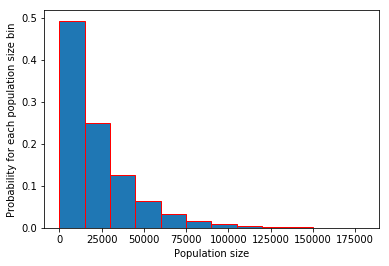

In [6]:
# Yule process at t=25
hist=[]
N=[]                  # a sequence of population size
n_max=180000          # maximum population size
t=25                  # time t=25 
dn=int(n_max/12)      # separate the sequence of population size into 12 bins
n=np.array(range(1,n_max+1,1)) # population size from 1 to 180000
t=np.array([t]*len(n))

# Yule process with Pn(t)=exp(-beta*t)*(1-exp(-beta*t))^(n-1)
P=(np.exp(np.array([-0.4]*len(n))*t)*(np.array([1]*len(n))-np.exp(np.array([-0.4]*len(n))*t))**(n-np.array([1]*len(n))))

# plot the distribution of population size
for i in range(12):
    hist.append(np.sum(P[i*dn:i*dn+dn]))
    N.append(n[i*dn+int(dn/2)])
plt.bar(N,hist,width=dn,edgecolor='r')
plt.xlabel('Population size')
plt.ylabel('Probability for each population size bin')

K-leaping for time t=25, v(t)=0.4n

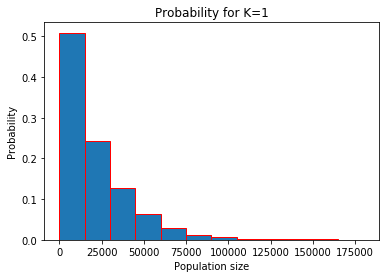

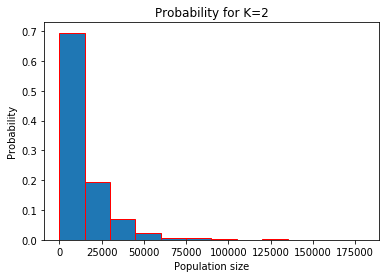

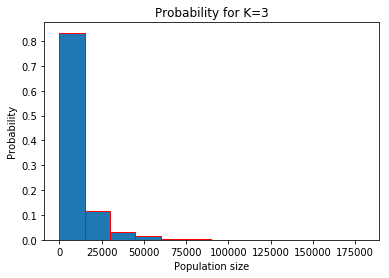

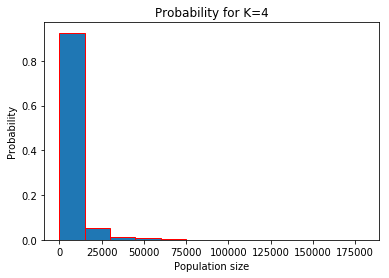

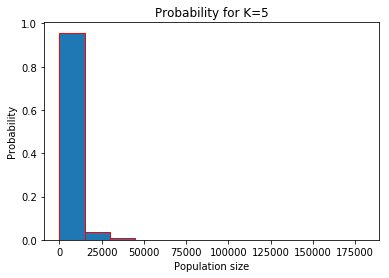

In [2]:
N=1000             # number of iterations
K=[1, 2, 3, 4, 5]   # number of different K values
n0=1                # initial population size
n=[0]*N             # population size at time t
t0=0                # initial time
t=[0.0]*N           # time at the end
n_bins=12          # number of bins
P=180000          # maximum population size
for i in range(len(K)):
    for j in range(N):

        # initialize the time t and population size
        t[j]=t0
        n[j]=n0
        
        # random sample t increment (dt) from gamma distribution
        dt=np.random.gamma(K[i], scale=(1/(0.4*n[j])), size=None)
        t[j]=t[j]+dt
        while (t[j]<=25):
            n[j]=n[j]+K[i]  #population size
            dt=np.random.gamma(K[i], scale=(1/(0.4*n[j])), size=None)
            t[j]=t[j]+dt
    
    (n_hist,n_Bins)=np.histogram(n,bins=range(0,P+1,int(P/n_bins)))        
    N_Bins=n_Bins[0:n_bins]+int(P/n_bins/2)
    prob_hist=n_hist/N   
    fig = plt.figure()
    plt.bar(N_Bins,prob_hist,width=int(P/n_bins),edgecolor='r')
    plt.title(f'Probability for K={K[i]}')
    plt.xlabel('Population size')
    plt.ylabel('Probability')

In [3]:
@jit
def K_leap(K,x_0,T,typ,lambda_u):
    x=[x_0]               #molecule count 
    t_x=[0]            #reaction time of fully-observed trajectory
    i=0
    while t_x[i]<T:
        if typ=='homogeneous':
            a=0.4*x[i]  
            delta_t=np.random.gamma(K,1./a)
            x=np.append(x,[x[i]+K])
            t_x=np.append(t_x,[t_x[i]+delta_t])
            i+=1
        else:          #Nonhomogeneous
            s=[0]
            t=0
            while t_x[i]<T:
                # generate 2 independent uniform numbers U1 and U2
                u=np.random.uniform(0,1,2) 
                # set t ← t −1/λu log u1
                t-=(1./lambda_u)*np.log(u[0])
                # if u2 ≤ λ(t)/λu then deliver t
                if u[1]<=(0.4*x[i]+2*np.sin(t))/lambda_u:
                    diff=t-t_x[i]
                    t_x=np.append(t_x,[t_x[i]+K*diff])
                    x=np.append(x,[x[i]+K])
                    t=t_x[i]+K*diff
                    i+=1
    return x,t_x

@jit
def simulate(x_0,K,N,repeats,ylims,typ,lambda_u):
    f,axes = plt.subplots(1,len(K),figsize=(len(K)*3,3))
    x_collect=np.zeros([N+1,repeats,len(K)])
    sol = solve_ivp(bdi_new, [0, N], [x_0],t_eval=np.linspace(0,N,2*N))
    for i in range(len(K)):
        for j in range(repeats):
            x,t_x=K_leap(K[i],x_0,N,typ,lambda_u)
            x_collect[:,j,i]=subsample(t_x,x,N)
            axes[i].plot(t_x,x,c='C0',alpha=0.05)
        axes[i].plot(range(N+1),np.mean(x_collect[:,:,i],1),c='C0',label=r'E[N(t)]')
        axes[i].set_xlim([0,N])
        axes[i].set_xticks(np.linspace(0,N,4))
        if ylims != None:
            axes[i].set_ylim([0,ylims])
            axes[i].set_yticks(np.linspace(0,ylims,3))
        axes[i].set_title('K=%d'%(K[i]))
        axes[i].set_xlabel('t')
        axes[i].plot(sol.t,sol.y.T,c='C1',label='Deterministic')
    axes[0].set_ylabel('population count')
    axes[0].legend()
    plt.tight_layout(w_pad=2)
    return x_collect

def subsample(t_x,x,N):
    y=np.zeros(N+1)
    y[0]=x[0]
    last=0
    for k in range(1,len(t_x)):
        i=np.ceil(t_x[k]).astype(int)
        if i<0:
            print(t_x[k])
            print('error')
        if i>N:
            y[N]=x[last]
            break
        y[i]=x[k]
        last=k
    for i in range(1,N+1):
        if y[i]==0:
            y[i]=y[i-1]
    return y

def bdi_new(t,y):
    if typ=='homogeneous':
        j=0.4*y
    else:
        j=0.4*y+2*np.sin(t)
    return j

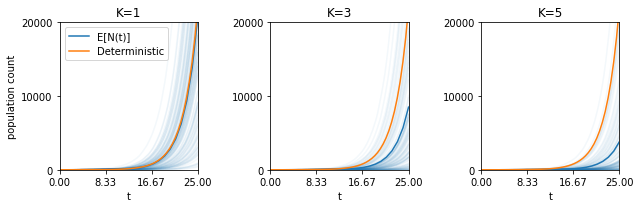

In [5]:
# compares the mean of the trajectories for the homogeneous case to the 
# deterministic solution.
x_0=1
K=[1,3,5]    #values of K considered
N=25 #time at end of simulation                                                                 
repeats=100
ylims=20000  #can be None
typ='homogeneous'
x_collect=simulate(x_0,K,N,repeats,ylims,typ,None)

# Simulation of a Nonhomogenous Poisson process v(t)=0.4n+2sint

Currently the most popular method for generating nonhomogenous Poisson processes is the “process
analogue” of acceptance-rejection called thinning. The intuitive idea behind thinning is to first
find a constant rate function λu(t) = λu which dominates the desired rate function λ(t), next
generate from the implied homogeneous Poisson process with rate λu(t) = λu, and then reject an
appropriate fraction of the generated events so that the desired rate λ(t) is achieved. The following
theorem is the basis for this procedure.

Theorem 3 (Lewis and Shedler, 1979). Consider a nonhomogeneous Poisson process with rate function λu(t), t ≥ 0. Suppose that T1*, T2*, ..., Tn* are random variables representing event times from the nonhomogeneous Poisson process with rate function λu(t), and lying in the fixed interval (0, t0]. Let λ(t) be a rate function such that 0 ≤ λ(t) ≤ λu(t) for all t ∈ (0, t0]. If the ith event time Ti* is independently deleted with probability 1 − λ(t)/λu(t) for i = 1, 2, . . . , n, then the remaining event times form a nonhomogeneous Poisson process with rate function λ(t) in the interval (0, t0].

Algorithm 6:
(0) Initialize t = 0.
(1) Generate u1 ∼ U(0, 1).
(2) Set t ← t −1/λu log u1.
(3) Generate u2 ∼ U(0, 1) independent of u1.
(4) If u2 ≤ λ(t)/λu then deliver t.
(5) Go to Step (1).


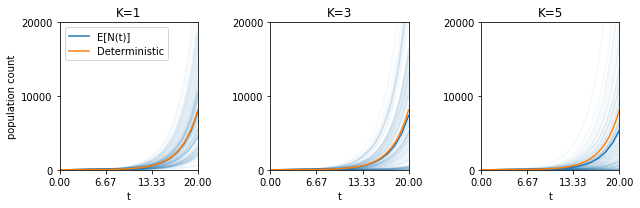

In [13]:
# compares the mean of the trajectories for the nonhomogeneous case to the 
# deterministic solution.
x_0=1
K=[1,3,5]                 #values of K considered
N=20                      #time at end of simulation                                                                 
repeats=100
ylims=20000               # lambda upper bound on [0,N]
typ='nonhomogeneous'
x_collect=simulate(x_0,K,N,repeats,ylims,typ,ylims)

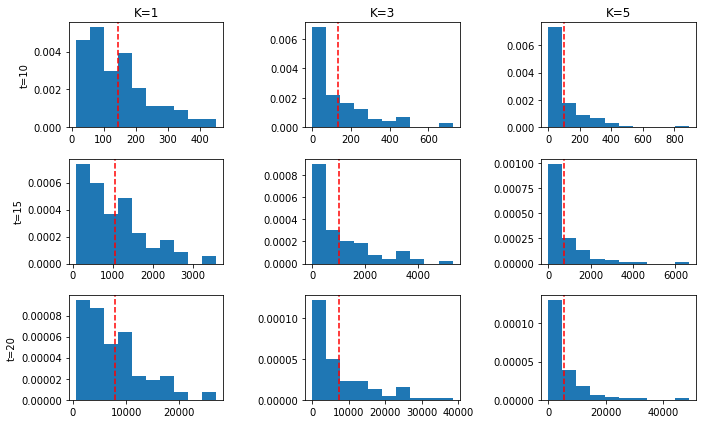

In [14]:
time=[10,15,20]          #time-stamps considered
f,axes=plt.subplots(len(K),len(time),figsize=(10,6))
for i in range(len(time)):
    for j in range(len(K)):
        arr=x_collect[time[i],:,j]
        result = np.all(arr == arr[0])
        if result:
            axes[i,j].bar([arr[0]-1,arr[0],arr[0]+1],[0,1,0])
        else:    
            axes[i,j].hist(arr,density=True)
        axes[i,j].axvline(x=np.mean(arr),linestyle='--', color='r')
    axes[i,0].set_ylabel('t=%d' %(time[i]))
for i in range(len(K)):
    axes[0,i].set_title('K=%d'%(K[i]))
plt.tight_layout(h_pad=1,w_pad=2) 